<a href="https://colab.research.google.com/github/yo3333333/CID/blob/main/Hands-on%201%3A%20Percepton%20Notebook%20(Tutorial)%5CPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Fundamentos de la tecnica:**


---



El Perceptrón es el modelo más simple de una neurona artificial,su objetivo es clasificar datos en dos clases mediante una frontera de decisión lineal.

El perceptrón tiene tres partes principales:

*  Entradas (x₁, x₂, …, xₙ) → son las características o variables del problema.
*  Pesos (w₁, w₂, …, wₙ) → indican la importancia de cada entrada.
*  Sesgo (b) → permite desplazar la frontera de decisión.

Cada entrada se multiplica por su peso y se suman todos los resultados:

                    z=w_1 x_1+w_2 x_2+...+w_n x_n + b

Luego se aplica una función de activación

                    y = { 1 si z ≥ 0
                          0 si z < 0

El perceptrón aprende ajustando los pesos cada vez que comete un error en la predicción.


**1.2 Modelo Matematico**

---
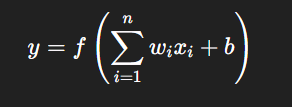


**1.3 Descripción de las librerias Pandas y scikit-learn:**


---



**Descripción de la librería pandas**

Pandas es una biblioteca de Python diseñada para la manipulación y análisis de datos. Permite trabajar con estructuras de datos como DataFrame, que funcionan como tablas con filas y columnas.

Ofrece herramientas para leer archivos (como CSV o Excel), seleccionar columnas, filtrar información y preparar los datos antes de aplicar modelos de Machine Learning.

En este programa, pandas se utiliza para cargar el dataset Social_Network_Ads.csv y extraer las columnas necesarias para el entrenamiento del perceptrón.



---


**Descripción de la librería scikit-learn**

Scikit-learn es una biblioteca de Python utilizada para crear y evaluar modelos de Machine Learning. Incluye herramientas para entrenar algoritmos, preprocesar datos y medir el rendimiento de los modelos.

En este programa, se usa para dividir los datos, normalizarlos, entrenar el perceptrón y evaluar su exactitud mediante sus distintos módulos (model_selection, preprocessing, linear_model, metrics).


---





In [2]:
# Perceptrón con dataset de Kaggle (Social Network Ads)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**Objetivo: Predecir con un perceptron si una persona compraria un producto despues de ver un anuncio en una red social, basandose en su edad y salario y en la información del dataset Social_Network_Add**

**Implementación del codigo**

Cargar el dataset que se va a usar e indicar las columas que se van a usar para las entradas y la columna que se quiere predecir


In [5]:
data = pd.read_csv("Social_Network_Ads.csv")

X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

Escalar los datos

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Se dividen los datos en entrenamiento y en prueba, el test size indica cuanto porcentaje de los datos se va a tomar para la prueba, en este caso 30%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

Se crea y se entrena el perceptron con los datos de entrenamiento que separamos anteriormente

In [8]:
perceptron = Perceptron(max_iter=1000, eta0=0.1)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1)

Se hace el test con los datos de prueba (se predice con los datos de prueba para ver que tan eficiente es el modelo)

In [9]:
y_pred = perceptron.predict(X_test)

Se calcula la presición del modelo

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del perceptrón:", accuracy)

Exactitud del perceptrón: 0.775


**1.4 Pipeline**


---



**Feature Engineering**


---



En este proyecto se emplean dos variables de entrada obtenidas del dataset Social_Network_Ads.csv:

Age: Edad del usuario.

EstimatedSalary: Salario estimado del usuario.

La variable de salida es:

Purchased: Indica si el usuario compró el producto (1) o no lo hizo (0).

Estas variables permiten representar el comportamiento del usuario frente a un anuncio y son suficientes para construir un modelo que aprenda a clasificar entre las dos clases.

 **Modelo Selection**


---



Se utiliza un clasificador lineal porque su objetivo es distinguir entre dos clases (1 y 0), lo que lo hace ideal para este tipo de problema binario. En este caso, se eligió el Perceptrón, ya que es un modelo simple que aprende una frontera lineal para separar las clases.
Además, el perceptrón es rápido, fácil de interpretar y tiene bajo costo computacional, lo que permite entrenarlo y aplicarlo eficientemente incluso con pocos recursos.

**Model Training**


---



Las lineas de codigo para entrenar el modelo son:




In [11]:
perceptron = Perceptron(max_iter=1000, eta0=0.1)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1)

Donde max_iter define el número máximo de iteraciones durante el entrenamiento y eta0 la tasa de aprendizaje.

**Prediction**


---



Se hizo la siguiente función para predecir cualquier caso en donde pasemos su edad y su salario, en esta se escalan los datos que recibimos y se usa el perceptron para predecir si el usuario compra o no un producto de acuerdo a lo que devolvio nuestro modelo

In [13]:
def probar_patron(edad, salario):
    datos = scaler.transform([[edad, salario]])
    prediccion = perceptron.predict(datos)
    return "Compra (1)" if prediccion == 1 else "No compra (0)"


Usamos la funcion pasandole el modelo, y la edad y salario que queremos predecir, en este caso 30 años y $30,000

In [14]:
probar_patron(30,30000)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'No compra (0)'

**Model Evaluation**

---



La evaluación se realiza mediante la métrica de exactitud (Accuracy), que indica el porcentaje de predicciones correctas:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del perceptrón:", accuracy)

Exactitud del perceptrón: 0.7916666666666666


**Referencias**



*   Daniel. (2022, March 7). Perceptrón: ¿qué es y para qué sirve? DataScientest. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve?utm_source=chatgpt.com


*   Rodrigo. (2025). Algoritmo Perceptrón. Cienciadedatos.net. https://cienciadedatos.net/documentos/50_algoritmo_perceptron?utm_source=chatgpt.com



